# Objective

<span style = "color: black; font-family: arial; font-size: 20px;">
The analysis was made to help the company optimize its marketing expenses by defining strategies and identifying the most effective channels and periods for the application of resources, in order to maximize the return of the investment.

# Loading the data

In [30]:
# Loading libraries
from scipy import stats as st
import numpy as np
import pandas as pd
from math import factorial
import math
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Preparing the data

### Dataframe Visits

In [33]:
# Loading 'Visits' dataframe
visits = pd.read_csv(r"C:\Users\pedro\Documents\Dataframes projetos\yafisha-cohorts-analysis\visits_log_us.csv")
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [34]:
# Going through the headers and converting everything to lowercase
new_col_names=[]
for old_name in visits.columns:
    name_lowered=old_name.lower()
    new_col_names.append(name_lowered)
visits.columns=new_col_names
print(visits.columns)

Index(['device', 'end ts', 'source id', 'start ts', 'uid'], dtype='object')


In [35]:
# Renaming the columns 'end ts', 'source id' and 'start ts'
columns_new = {'end ts': 'end_ts', 'source id': 'source_id', 'start ts': 'start_ts'  }
visits.rename(columns=columns_new, inplace=True)
print(visits.columns)

Index(['device', 'end_ts', 'source_id', 'start_ts', 'uid'], dtype='object')


In [36]:
# Transforming the columns "end_ts" and "start_ts" into 'DATETIME'
visits['start_ts'] = pd.to_datetime(visits['start_ts'])
visits['end_ts'] = pd.to_datetime(visits['end_ts'])

In [37]:
# Checking missing values
print(visits.isna().sum())

device       0
end_ts       0
source_id    0
start_ts     0
uid          0
dtype: int64


In [38]:
# Checking duplicates
print(visits.duplicated().sum())

0


### Dataframe Orders

In [40]:
# Loading 'Orders' dataframe
orders = pd.read_csv(r"C:\Users\pedro\Documents\Dataframes projetos\yafisha-cohorts-analysis\orders_log_us.csv")
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [41]:
# Going through the headers and converting everything to lowercase
new_col_names=[]
for old_name in orders.columns:
    name_lowered=old_name.lower()
    new_col_names.append(name_lowered)
orders.columns=new_col_names
print(orders.columns)

Index(['buy ts', 'revenue', 'uid'], dtype='object')


In [42]:
# Renaming the column 'buy ts'
columns_new = {'buy ts': 'buy_ts'}
orders.rename(columns=columns_new, inplace=True)
print(orders.columns)

Index(['buy_ts', 'revenue', 'uid'], dtype='object')


In [43]:
# Transforming the column "buy_ts" into 'DATETIME'
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])

In [44]:
# Checking missing values
print(orders.isna().sum())

buy_ts     0
revenue    0
uid        0
dtype: int64


In [45]:
# Checking duplicates
print(orders.duplicated().sum())

0


### Dataframe Costs

In [47]:
# Loading 'Costs' dataframe
costs = pd.read_csv(r"C:\Users\pedro\Documents\Dataframes projetos\yafisha-cohorts-analysis\costs_us.csv")
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [48]:
# Transforming the column "dt" into 'DATETIME'
costs['dt'] = pd.to_datetime(costs['dt'])

In [49]:
# Verifying missing values 
print(costs.isna().sum())

source_id    0
dt           0
costs        0
dtype: int64


In [50]:
# Verifying duplicates 
print(costs.duplicated().sum())

0


# Data Analysis

<span style = "color: red; font-family: arial; font-size: 20px;">
Product:

<span style = "color: Blue; Font-Family: Arial; Font-Size: 20px;">
Calculating how many people use the product every day, week and month.

In [54]:
# Transforming the columns into date
visits['session_year'] = visits['start_ts'].dt.year
visits['session_month'] = visits['start_ts'].dt.to_period('M')
visits['session_week'] = visits['start_ts'].dt.to_period('W')
visits['session_date'] = visits['start_ts'].dt.date

In [55]:
# Calculating the number of daily active users
dau_total = visits.groupby('session_date').agg({'uid': 'nunique'}).mean()['uid']
print(int(dau_total))

907


In [56]:
# Calculating the number of weekly active users
wau_total = visits.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'}).mean()['uid']
print(int(wau_total))

5716


In [57]:
# Calculating the number of monthly active users
mau_total = (visits.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'}).mean())['uid']
print(int(mau_total))

23228


<span style = "color: black; font-family: arial; font-size: 20px;">
907 people use the product per day, 5716 use the product per week, and 23228 use the product per year

<span style = "color: Blue; Font-Family: Arial; Font-Size: 20px;">
Calculating how many sessions are occurring per day (a user can hold several sessions)

In [60]:
# Adding the number of sessions per date
sess_per_user = visits.groupby('session_date').agg({'uid': ['count','nunique']})
sess_per_user.columns = ['n_sessions', 'n_users']
sess_per_user['sess_per_user'] = sess_per_user['n_sessions'] / sess_per_user['n_users']

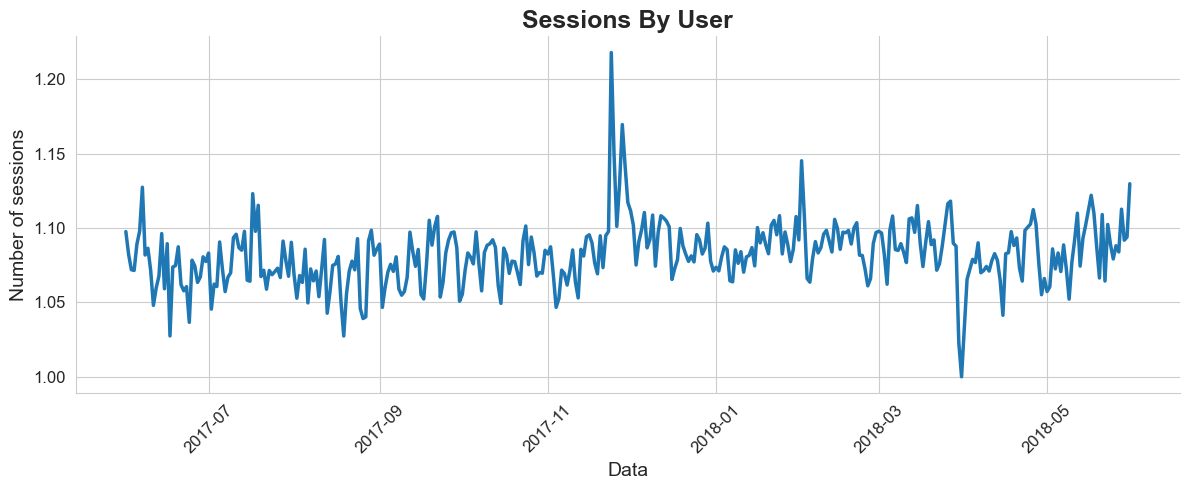

In [61]:
# Plotting a chart
sns.set_style("whitegrid")
plt.figure(figsize=(12, 5))
plt.plot(
    sess_per_user.index, 
    sess_per_user['sess_per_user'], 
    color='#1f77b4', 
    linewidth=2.5,  
    markersize=5
)
plt.title('Sessions By User', fontsize=18, fontweight='bold')
plt.xlabel('Data', fontsize=14)
plt.ylabel('Number of sessions', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
sns.despine()
plt.tight_layout()
plt.show()

<span style = "color: Blue; Font-Family: Arial; Font-Size: 20px;">
Calculating the length of each session

In [63]:
visits['session_duration_in_seconds'] = (visits['end_ts'] - visits['start_ts']).dt.seconds
print(visits['session_duration_in_seconds'].mean())

643.506488592098


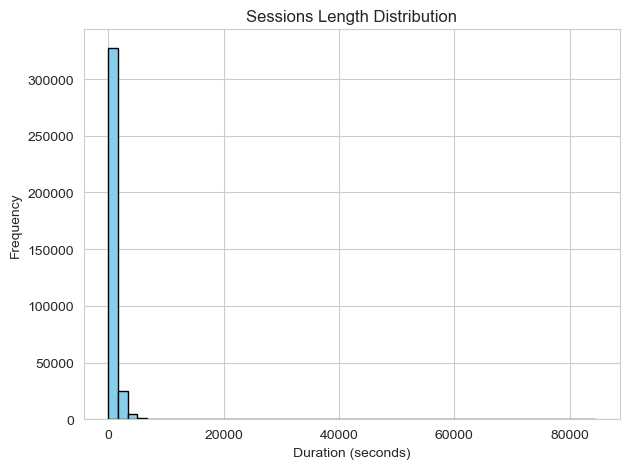

In [64]:
# Plotting a chart
visits['session_duration_in_seconds'].hist(bins=50, color='skyblue', edgecolor='black')
plt.title('Sessions Length Distribution')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

<span style = "color: black; font-family: arial; font-size: 20px;">
Each session has an average of 643 seconds

<span style = "color: Blue; Font-Family: Arial; Font-Size: 20px;">
Calculating the frequency which users return

In [67]:
# Calculating weekly and monthly retention rate
taxa_de_retenção_semanal = dau_total / wau_total * 100
print(taxa_de_retenção_semanal)
taxa_de_retenção_mensal = dau_total / mau_total * 100
print(taxa_de_retenção_mensal)

15.88440861589881
3.908969652437603


<span style = "color: black; font-family: arial; font-size: 20px;">
The weekly retention rate is 15.88% and the monthly is 3.90%

In [69]:
# Filtering by first visits per user
visits['session_start_ts'] = visits['start_ts']
first_visits = visits.groupby('uid').agg({'session_start_ts': 'min'}).reset_index()
first_visits.columns = ['uid', 'first_session_start_ts']
first_visits['first_session_dt'] = first_visits['first_session_start_ts'].dt.date
first_visits['first_session_month'] = first_visits ['first_session_start_ts'].dt.to_period('M')
first_visits.head()

,uid,first_session_start_ts,first_session_dt,first_session_month
0,11863502262781,2018-03-01 17:27:00,2018-03-01,2018-03
1,49537067089222,2018-02-06 15:55:00,2018-02-06,2018-02
2,297729379853735,2017-06-07 18:47:00,2017-06-07,2017-06
3,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09
4,325320750514679,2017-09-30 14:29:00,2017-09-30,2017-09


In [70]:
# Merging with 'Visits' dataframe
visits_full = pd.merge(first_visits, visits, on='uid')
visits_full['age_months'] = ((visits_full['session_month'].dt.year - visits_full['first_session_month'].dt.year) * 12 + (visits_full['session_month'].dt.month - visits_full['first_session_month'].dt.month))
visits_full.head()

,uid,first_session_start_ts,first_session_dt,first_session_month,device,end_ts,source_id,start_ts,session_year,session_month,session_week,session_date,session_duration_in_seconds,session_start_ts,age_months
0,11863502262781,2018-03-01 17:27:00,2018-03-01,2018-03,touch,2018-03-01 17:33:00,3,2018-03-01 17:27:00,2018,2018-03,2018-02-26/2018-03-04,2018-03-01,360,2018-03-01 17:27:00,0
1,49537067089222,2018-02-06 15:55:00,2018-02-06,2018-02,touch,2018-02-06 15:57:00,2,2018-02-06 15:55:00,2018,2018-02,2018-02-05/2018-02-11,2018-02-06,120,2018-02-06 15:55:00,0
2,297729379853735,2017-06-07 18:47:00,2017-06-07,2017-06,desktop,2017-06-07 18:48:00,3,2017-06-07 18:47:00,2017,2017-06,2017-06-05/2017-06-11,2017-06-07,60,2017-06-07 18:47:00,0
3,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09,desktop,2018-03-11 17:29:00,2,2018-03-11 17:23:00,2018,2018-03,2018-03-05/2018-03-11,2018-03-11,360,2018-03-11 17:23:00,6
4,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09,desktop,2017-09-18 23:07:00,2,2017-09-18 22:49:00,2017,2017-09,2017-09-18/2017-09-24,2017-09-18,1080,2017-09-18 22:49:00,0


In [71]:
# Making the cohort
cohort = visits_full.pivot_table(
    index='first_session_month',
    columns='age_months',
    values='uid',
    aggfunc='nunique'
)
cohort.fillna('')

age_months,0,1,2,3,4,5,6,7,8,9,10,11
first_session_month,,,,,,,,,,,,
2017-06,13259.0,1043.0,713.0,814.0,909.0,947.0,809.0,766.0,694.0,674.0,539.0,596.0
2017-07,13140.0,737.0,674.0,738.0,765.0,633.0,596.0,601.0,510.0,376.0,361.0,
2017-08,10181.0,783.0,640.0,639.0,510.0,448.0,370.0,402.0,284.0,265.0,,
2017-09,16704.0,1428.0,1156.0,847.0,658.0,632.0,599.0,404.0,381.0,,,
2017-10,25977.0,2042.0,1357.0,1012.0,890.0,837.0,555.0,529.0,,,,
2017-11,27248.0,2133.0,1202.0,1054.0,919.0,638.0,594.0,,,,,
2017-12,25268.0,1410.0,960.0,786.0,512.0,481.0,,,,,,
2018-01,22624.0,1351.0,890.0,565.0,458.0,,,,,,,
2018-02,22197.0,1267.0,565.0,446.0,,,,,,,,


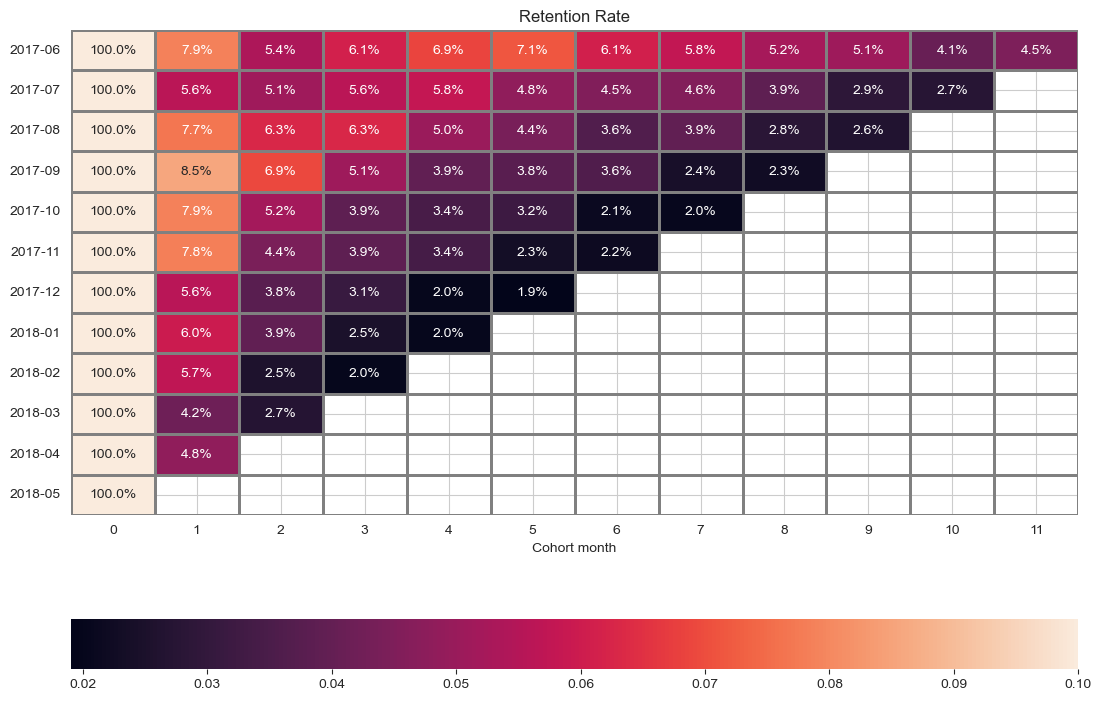

In [72]:
# Dividing active users by the number of users in the month of their first visits
retentionn = pd.DataFrame()
for column in cohort.columns:
    retentionn = pd.concat([retentionn, cohort[column] / cohort[0]], axis=1)
retentionn.columns = cohort.columns
retentionn.index = [str(x)[0:10] for x in retentionn.index]

# Plotting a Heat Map
plt.figure(figsize = (13,9))
sns.heatmap(retentionn, annot=True, fmt= '.1%', linewidths=1, linecolor='grey', vmax=0.1, cbar_kws = {'orientation': 'horizontal'}).set(title='Retention Rate')
plt.xlabel('Cohort month')
plt.show()

<span style = "color: black; font-family: arial; font-size: 20px;">
There is a high turnover rate in the first months, and long term retention is low.

<span style = "color: red; font-family: arial; font-size: 20px;">
Sales:

<span style = "color: Blue; Font-Family: Arial; Font-Size: 20px;">
Calculating when people start buying

In [76]:
# Adding month
orders['order_month'] = orders['buy_ts'].dt.to_period('M')

# Finding the first orders
first_orders = orders.groupby('uid').agg({'buy_ts': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_ts']
first_orders['first_order_dt'] = first_orders['first_order_ts'].dt.date
first_orders['first_order_month'] = first_orders['first_order_ts'].dt.to_period('M')

# Generating a dataframe with the first orders and the first visits
buyers = pd.merge(first_visits, first_orders, on='uid')
buyers.head()

,uid,first_session_start_ts,first_session_dt,first_session_month,first_order_ts,first_order_dt,first_order_month
0,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09,2018-01-03 21:51:00,2018-01-03,2018-01
1,1575281904278712,2017-06-03 10:13:00,2017-06-03,2017-06,2017-06-03 10:13:00,2017-06-03,2017-06
2,2429014661409475,2017-10-11 17:14:00,2017-10-11,2017-10,2017-10-11 18:33:00,2017-10-11,2017-10
3,2464366381792757,2018-01-27 20:10:00,2018-01-27,2018-01,2018-01-28 15:54:00,2018-01-28,2018-01
4,2551852515556206,2017-11-24 10:14:00,2017-11-24,2017-11,2017-11-24 10:14:00,2017-11-24,2017-11


In [77]:
buyers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36523 entries, 0 to 36522
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   uid                     36523 non-null  uint64        
 1   first_session_start_ts  36523 non-null  datetime64[ns]
 2   first_session_dt        36523 non-null  object        
 3   first_session_month     36523 non-null  period[M]     
 4   first_order_ts          36523 non-null  datetime64[ns]
 5   first_order_dt          36523 non-null  object        
 6   first_order_month       36523 non-null  period[M]     
dtypes: datetime64[ns](2), object(2), period[M](2), uint64(1)
memory usage: 2.0+ MB


In [78]:
# Adding 'days_to_first_purchase' column
buyers['first_order_dt'] = pd.to_datetime(buyers['first_order_dt'])
buyers['first_session_dt'] = pd.to_datetime(buyers['first_session_dt'])

buyers['days_to_first_purchase'] = ((buyers['first_order_ts'] - buyers['first_session_start_ts']) / np.timedelta64(1, 'D')).astype(int)
buyers.head()

,uid,first_session_start_ts,first_session_dt,first_session_month,first_order_ts,first_order_dt,first_order_month,days_to_first_purchase
0,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09,2018-01-03 21:51:00,2018-01-03,2018-01,106
1,1575281904278712,2017-06-03 10:13:00,2017-06-03,2017-06,2017-06-03 10:13:00,2017-06-03,2017-06,0
2,2429014661409475,2017-10-11 17:14:00,2017-10-11,2017-10,2017-10-11 18:33:00,2017-10-11,2017-10,0
3,2464366381792757,2018-01-27 20:10:00,2018-01-27,2018-01,2018-01-28 15:54:00,2018-01-28,2018-01,0
4,2551852515556206,2017-11-24 10:14:00,2017-11-24,2017-11,2017-11-24 10:14:00,2017-11-24,2017-11,0


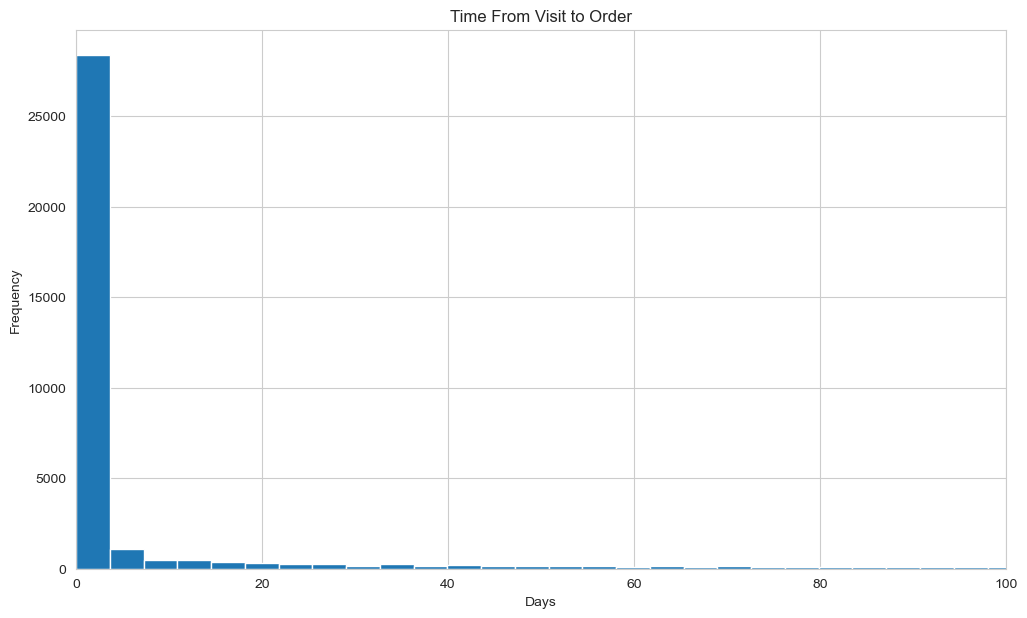

In [79]:
(buyers['days_to_first_purchase'].plot(kind='hist', bins=100, figsize=(12,7)).set(title = 'Time From Visit to Order', xlabel='Days', ylabel = 'Frequency'))
plt.xlim(0,100)
plt.show()

<span style = "color: black; font-family: arial; font-size: 20px;">
People start buying around 16 days, which is the time that users start a session until the moment they place an order

<span style = "color: Blue; Font-Family: Arial; Font-Size: 20px;">
Calculating how many orders the customers do over a certain period of time

In [82]:
# Adding the revenue
cohort_size = buyers.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_size.rename(columns={'uid': 'n_buyers'}, inplace=True)

cohortts = pd.merge(orders, buyers, how='inner', on='uid')\
.groupby(['first_order_month', 'order_month'])\
.agg({'revenue': 'count'}).reset_index()

cohortts.head()

,first_order_month,order_month,revenue
0,2017-06,2017-06,2354
1,2017-06,2017-07,177
2,2017-06,2017-08,174
3,2017-06,2017-09,226
4,2017-06,2017-10,292


In [83]:
# Calculating 'age'
cohortts['age_month'] = ((cohortts['order_month'].dt.year - cohortts['first_order_month'].dt.year) * 12 + (cohortts['order_month'].dt.month - cohortts['first_order_month'].dt.month)) 
cohortts.columns = ['first_order_month', 'order_month', 'n_orders', 'age_month']

# Adding customers and calculating the number of orders per user
cohortts_report = pd.merge(cohort_size, cohortts, on= 'first_order_month')
cohortts_report['orders_per_buyer'] = cohortts_report['n_orders'] / cohortts_report['n_buyers']
cohortts_report.head()

,first_order_month,n_buyers,order_month,n_orders,age_month,orders_per_buyer
0,2017-06,2023,2017-06,2354,0,1.163618
1,2017-06,2023,2017-07,177,1,0.087494
2,2017-06,2023,2017-08,174,2,0.086011
3,2017-06,2023,2017-09,226,3,0.111715
4,2017-06,2023,2017-10,292,4,0.144340


In [84]:
# Making the cohort
cohortts_ltv = cohortts_report.pivot_table(
    index='first_order_month',
    columns='age_month',
    values='orders_per_buyer',
    aggfunc='sum'
).cumsum(axis=1)

cohortts_ltv.round(2).fillna('')

age_month,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06,1.16,1.25,1.34,1.45,1.59,1.7,1.84,1.92,2.03,2.1,2.15,2.19
2017-07,1.14,1.19,1.25,1.31,1.34,1.39,1.42,1.44,1.47,1.49,1.51,
2017-08,1.12,1.2,1.27,1.33,1.39,1.44,1.47,1.53,1.56,1.6,,
2017-09,1.14,1.22,1.28,1.35,1.37,1.42,1.46,1.48,1.5,,,
2017-10,1.14,1.22,1.25,1.28,1.31,1.34,1.35,1.38,,,,
2017-11,1.18,1.28,1.32,1.37,1.41,1.42,1.45,,,,,
2017-12,1.15,1.21,1.26,1.3,1.32,1.34,,,,,,
2018-01,1.12,1.19,1.24,1.25,1.28,,,,,,,
2018-02,1.12,1.18,1.21,1.22,,,,,,,,


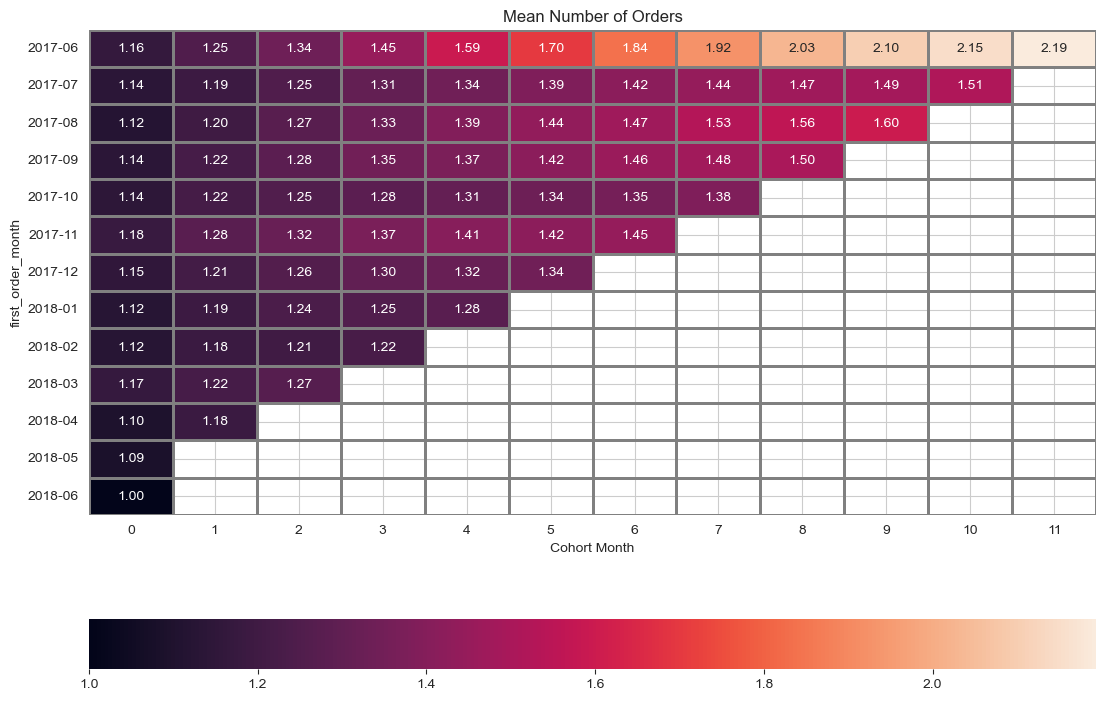

In [85]:
# Plotting the Heat Map
cohortts_ltv.index=cohortts_ltv.index.astype(str)
plt.figure(figsize = (13,9))
sns.heatmap(cohortts_ltv, annot=True, fmt='.2f', linewidths=1, linecolor='grey', cbar_kws= {'orientation': 'horizontal'}).set(title='Mean Number of Orders')
plt.xlabel('Cohort Month')
plt.show()

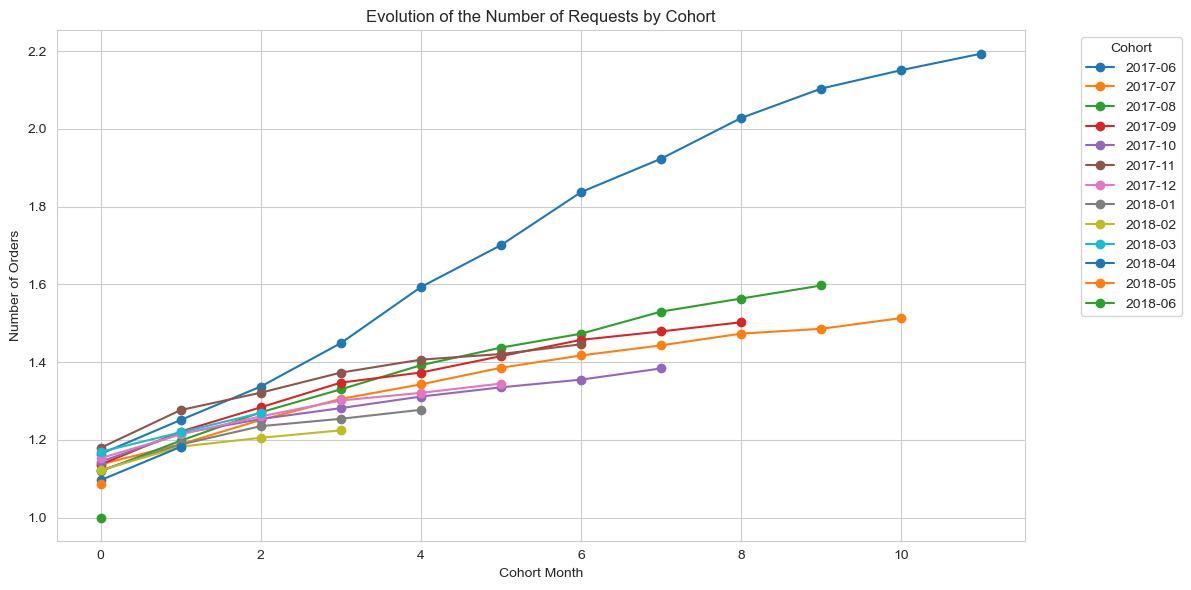

In [86]:
# Plotting a chart
plt.figure(figsize=(12, 6))

for coorte in cohortts_ltv.index:
    plt.plot(cohortts_ltv.columns, cohortts_ltv.loc[coorte], marker='o', label=str(coorte))

plt.title("Evolution of the Number of Requests by Cohort")
plt.xlabel("Cohort Month")
plt.ylabel("Number of Orders")
plt.legend(title="Cohort", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [87]:
print("Mean number of orders over the entire period:",round(cohortts_ltv.mean().mean(),2))

Mean number of orders over the entire period: 1.52


<span style = "color: black; font-family: arial; font-size: 20px;">
Each client made an average of 1 order during the time period.

The more time passes, the more customers tend to make more orders

<span style = "color: Blue; Font-Family: Arial; Font-Size: 20px;">
Calculating the mean volume of a purchase

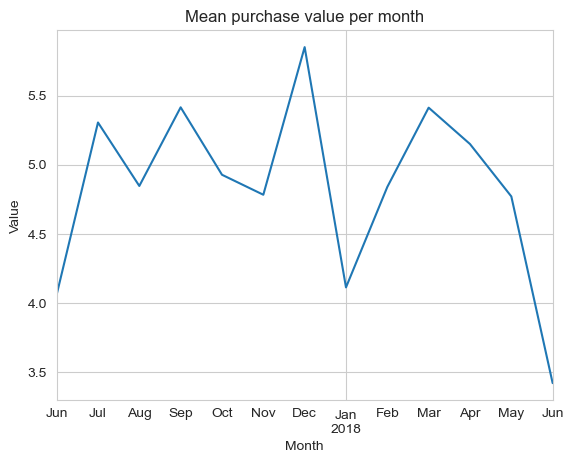

In [90]:
orders.pivot_table(index='order_month', values='revenue', aggfunc='mean').plot(legend=None).set(title='Mean purchase value per month', xlabel='Month', ylabel= 'Value')
plt.show()

In [91]:
print('Mean value of a purchase:', round(orders['revenue'].mean(),2))

Mean value of a purchase: 5.0


<span style = "color: black; font-family: arial; font-size: 20px;">
The mean volume of a purchase is 5

<span style = "color: Blue; Font-Family: Arial; Font-Size: 20px;">
Calculating the LTV

In [94]:
# Adding the number of customers for each month
cohort_sizes = buyers.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']
cohort_sizes.head()

,first_order_month,n_buyers
0,2017-06,2023
1,2017-07,1923
2,2017-08,1370
3,2017-09,2581
4,2017-10,4340


In [95]:
# Creating the cohort and adding revenue
cohort1 = pd.merge(orders, buyers, how='inner', on='uid').groupby(['first_order_month', 'order_month']).agg({'revenue': 'sum'}).reset_index() 
cohort1['age_month'] = ((cohort1['order_month'].dt.year - cohort1['first_order_month'].dt.year) * 12 + (cohort1['order_month'].dt.month - cohort1['first_order_month'].dt.month))
cohort1.head()

,first_order_month,order_month,revenue,age_month
0,2017-06,2017-06,9557.49,0
1,2017-06,2017-07,981.82,1
2,2017-06,2017-08,885.34,2
3,2017-06,2017-09,1931.30,3
4,2017-06,2017-10,2068.58,4


In [96]:
# Adding LTV
cohort_report = pd.merge(cohort_sizes, cohort1, on='first_order_month')
cohort_report['ltv'] = cohort_report['revenue'] / cohort_report['n_buyers']
cohort_report.head()

,first_order_month,n_buyers,order_month,revenue,age_month,ltv
0,2017-06,2023,2017-06,9557.49,0,4.724414
1,2017-06,2023,2017-07,981.82,1,0.485329
2,2017-06,2023,2017-08,885.34,2,0.437637
3,2017-06,2023,2017-09,1931.30,3,0.954671
4,2017-06,2023,2017-10,2068.58,4,1.022531


In [97]:
# Generating the cohort
cohort_ltv = cohort_report.pivot_table(index='first_order_month', columns = 'age_month', values='ltv', aggfunc= 'sum').cumsum(axis=1)
cohort_ltv.round(2).fillna('')

age_month,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06,4.72,5.21,5.65,6.6,7.62,8.36,9.31,9.89,10.45,11.05,11.62,11.88
2017-07,6.01,6.35,6.97,7.33,7.5,7.66,7.78,7.92,8.08,8.23,8.39,
2017-08,5.28,5.75,6.21,6.6,7.09,7.38,7.59,7.99,8.28,8.47,,
2017-09,5.64,6.76,7.28,11.26,11.66,12.31,13.01,13.25,13.44,,,
2017-10,5.00,5.54,5.73,5.89,6.04,6.16,6.24,6.36,,,,
2017-11,5.15,5.55,5.75,6.08,6.23,6.28,6.4,,,,,
2017-12,4.74,5.0,5.92,6.99,7.3,7.64,,,,,,
2018-01,4.14,4.43,4.73,4.88,4.94,,,,,,,
2018-02,4.16,4.44,4.51,4.59,,,,,,,,


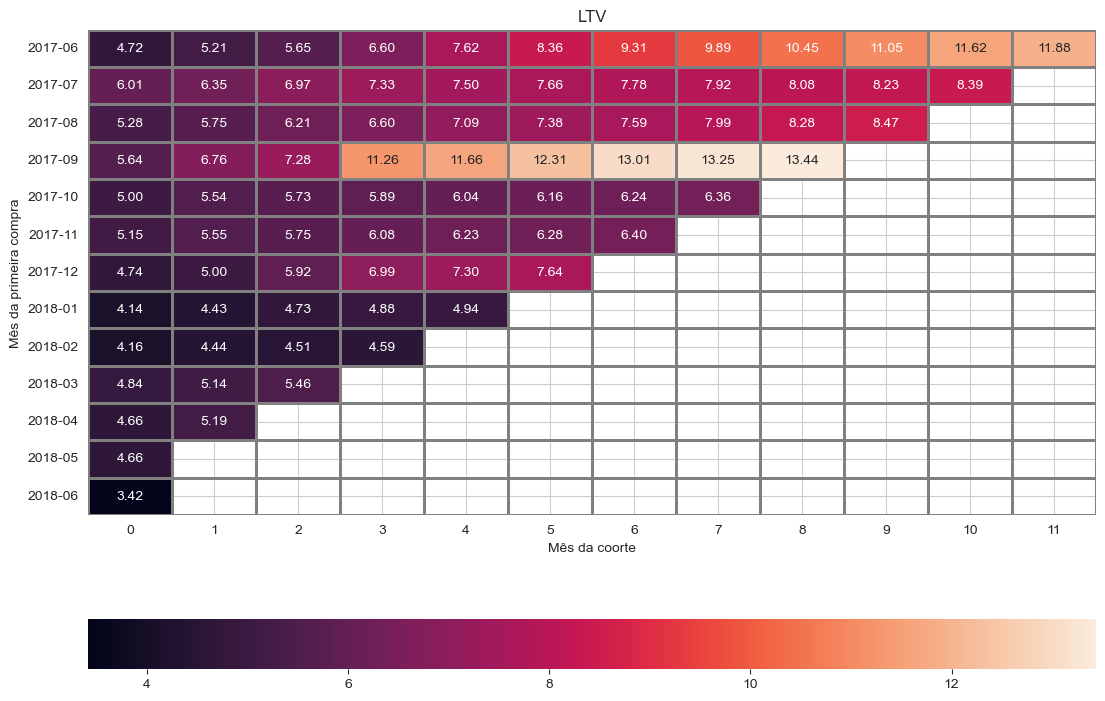

In [98]:
# Plotting a Heat Map
cohort_ltv.index=cohort_ltv.index.astype(str)
plt.figure(figsize = (13,9))
sns.heatmap(cohort_ltv, annot=True, fmt='.2f', linewidths=1, linecolor='grey', cbar_kws= {'orientation': 'horizontal'}).set(title='LTV')
plt.xlabel('Mês da coorte')
plt.ylabel('Mês da primeira compra')
plt.show()

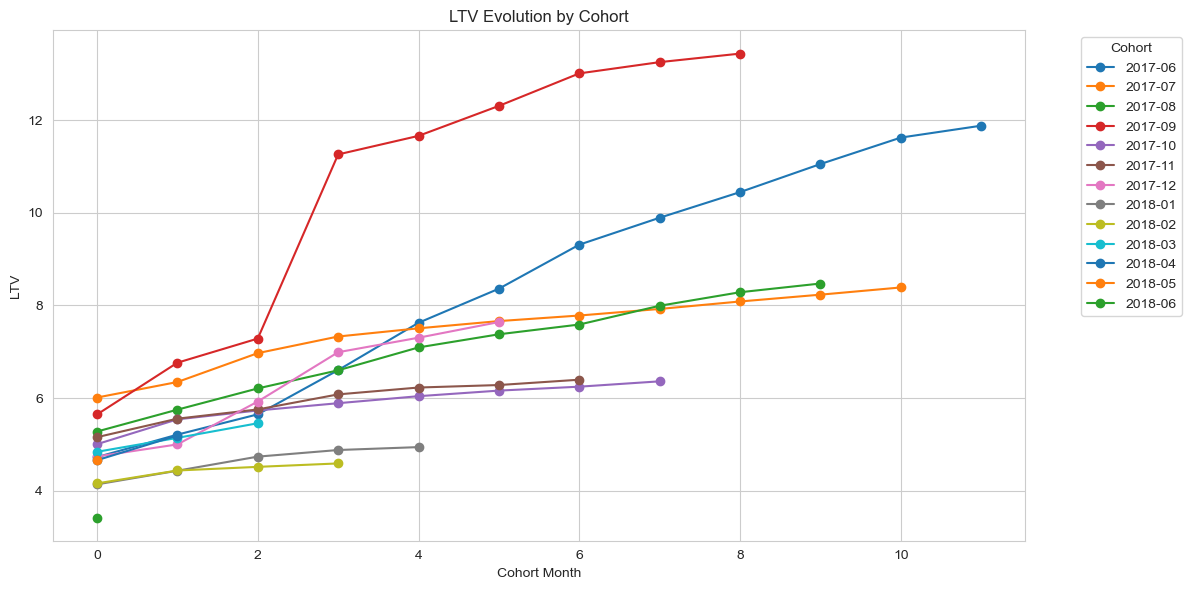

In [99]:
# Plotting a chart
plt.figure(figsize=(12, 6))

for coorte in cohort_ltv.index:
    plt.plot(cohort_ltv.columns, cohort_ltv.loc[coorte], marker='o', label=str(coorte))

plt.title("LTV Evolution by Cohort")
plt.xlabel("Cohort Month")
plt.ylabel("LTV")
plt.legend(title="Cohort", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [100]:
print('Mean LTV for 6 months:', round(cohort_ltv[5].mean(),2))

Mean LTV for 6 months: 7.97


In [101]:
print('Mean LTV:', (cohort_ltv.mean().mean()))

Mean LTV: 8.053762588882604


<span style = "color: black; font-family: arial; font-size: 20px;">

The mean LTV for the entire period is 8.05

In all cohorts the LTV increases as the months advance, which indicates that customers continue to buy and generate revenue over time.

September/2017's cohort is the highlight, becoming the largest LTV registered (13.44) in the month 8.

<span style = "color: red; font-family: arial; font-size: 20px;">
Marketing:

<span style = "color: Blue; Font-Family: Arial; Font-Size: 20px;">
Calculating how much money was spent on marketing

In [105]:
# Adicionando a coluna do mês do custo de marketing
costs['cost_month'] = costs['dt'].dt.to_period('M')
costs.head()

,source_id,dt,costs,cost_month
0,1,2017-06-01,75.20,2017-06
1,1,2017-06-02,62.25,2017-06
2,1,2017-06-03,36.53,2017-06
3,1,2017-06-04,55.00,2017-06
4,1,2017-06-05,57.08,2017-06


In [106]:
print(costs['costs'].sum())

329131.62


<span style = "color: black; font-family: arial; font-size: 20px;">
In total $ 329,131.62 with marketing were spent

In [108]:
# Calculating monthly costs
monthly_costs = costs.groupby('cost_month')['costs'].sum()
monthly_costs

cost_month
2017-06    18015.00
2017-07    18240.59
2017-08    14790.54
2017-09    24368.91
2017-10    36322.88
2017-11    37907.88
2017-12    38315.35
2018-01    33518.52
2018-02    32723.03
2018-03    30415.27
2018-04    22289.38
2018-05    22224.27
Freq: M, Name: costs, dtype: float64

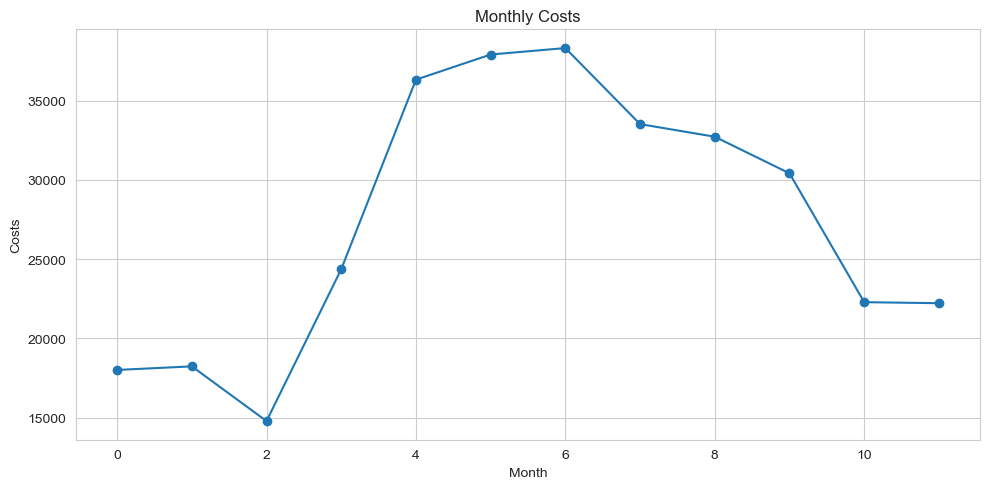

In [109]:
# Plotting a chart
plt.figure(figsize=(10, 5))
plt.plot(monthly_costs.values, marker='o')
plt.title('Monthly Costs')
plt.xlabel('Month')
plt.ylabel('Costs')
plt.grid(True)
plt.tight_layout()
plt.show()

<span style = "color: black; font-family: arial; font-size: 20px;">
The biggest spending on marketing were from month 4 to month 6.

<span style = "color: Blue; Font-Family: Arial; Font-Size: 20px;">
Calculating the total cost by Souce ID per month

In [112]:
# Calculating Source ID's costs per month
source_costs = costs.groupby('source_id')['costs'].sum()
source_costs

source_id
1      20833.27
2      42806.04
3     141321.63
4      61073.60
5      51757.10
9       5517.49
10      5822.49
Name: costs, dtype: float64

In [121]:
# Creating a pivot table
analysis_source = costs.pivot_table(index='cost_month', columns='source_id', values='costs', aggfunc='sum')
analysis_source

source_id,1,2,3,4,5,9,10
cost_month,,,,,,,
2017-06,1125.61,2427.38,7731.65,3514.80,2616.12,285.22,314.22
2017-07,1072.88,2333.11,7674.37,3529.73,2998.14,302.54,329.82
2017-08,951.81,1811.05,6143.54,3217.36,2185.28,248.93,232.57
2017-09,1502.01,2985.66,9963.55,5192.26,3849.14,415.62,460.67
2017-10,2315.75,4845.00,15737.24,6420.84,5767.40,609.41,627.24
2017-11,2445.16,5247.68,17025.34,5388.82,6325.34,683.18,792.36
2017-12,2341.20,4897.80,16219.52,7680.47,5872.52,657.98,645.86
2018-01,2186.18,4157.74,14808.78,5832.79,5371.52,547.16,614.35
2018-02,2204.48,4474.34,14228.56,5711.96,5071.31,551.50,480.88


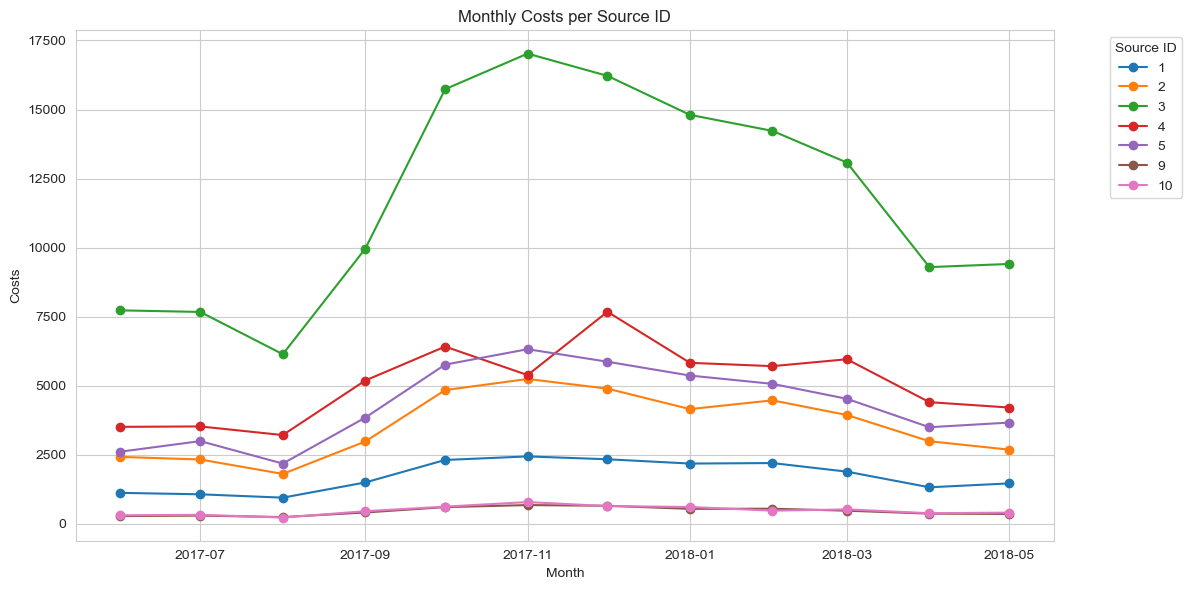

In [123]:
# Plotting a chart
analysis_source.index = analysis_source.index.to_timestamp()
plt.figure(figsize=(12, 6))

for source in analysis_source.columns:
    plt.plot(analysis_source.index, analysis_source[source], marker='o', label=str(source))

plt.title('Monthly Costs per Source ID')
plt.xlabel('Month')
plt.ylabel('Costs')
plt.legend(title='Source ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

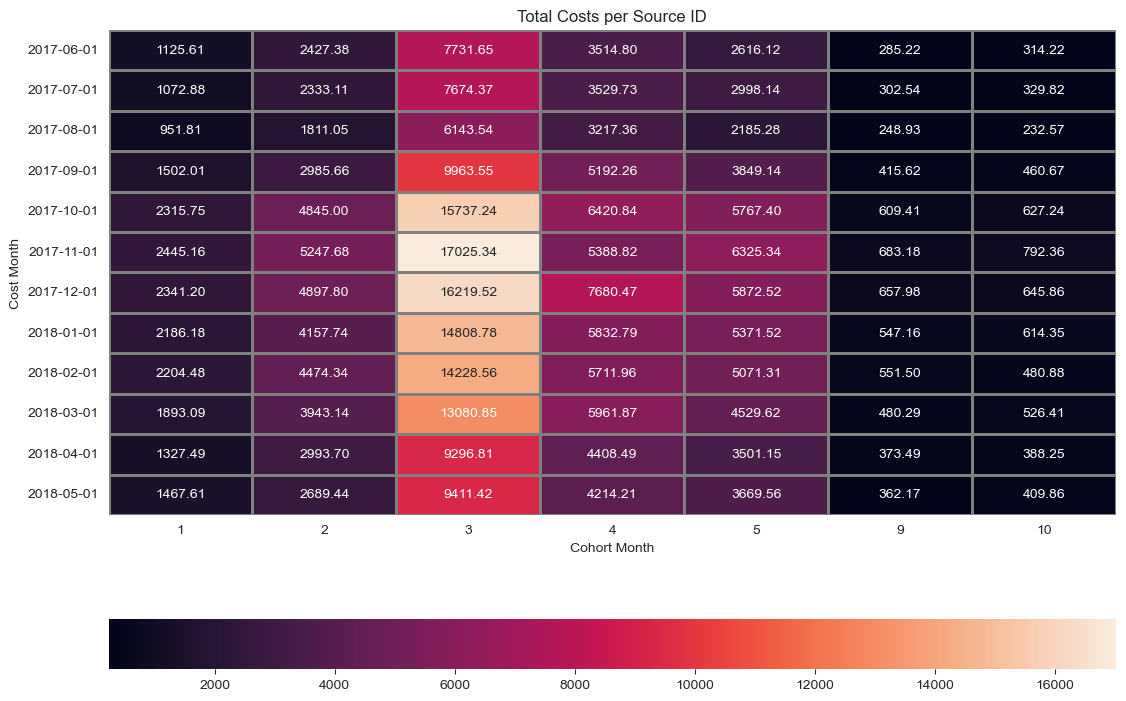

In [125]:
# Plotting a Heat Map
analysis_source.index=analysis_source.index.astype(str)
plt.figure(figsize = (13,9))
sns.heatmap(analysis_source, annot=True, fmt='.2f', linewidths=1, linecolor='grey', cbar_kws= {'orientation': 'horizontal'}).set(title='Total Costs per Source ID')
plt.xlabel('Cohort Month')
plt.ylabel('Cost Month')
plt.show()

<span style = "color: black; font-family: arial; font-size: 20px;">

ID 3 cost was the largest one (highlighting the months from 10/2017 to 03/2018).

ID 10 cost was the smallest one.

<span style = "color: Blue; Font-Family: Arial; Font-Size: 20px;">
Calculating CAC costs by Source ID

In [129]:
# Aggregating buyers
agg_buyers = buyers.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
agg_buyers.head()

,first_order_month,uid
0,2017-06,2023
1,2017-07,1923
2,2017-08,1370
3,2017-09,2581
4,2017-10,4340


In [131]:
# Calculating the costs per month
monthly_costs = costs.groupby('cost_month')['costs'].sum().reset_index()
monthly_costs

,cost_month,costs
0,2017-06,18015.00
1,2017-07,18240.59
2,2017-08,14790.54
3,2017-09,24368.91
4,2017-10,36322.88
5,2017-11,37907.88
6,2017-12,38315.35
7,2018-01,33518.52
8,2018-02,32723.03
9,2018-03,30415.27


In [133]:
# Adding costs data to the report and calculating CAC
report_ = pd.merge(agg_buyers, monthly_costs, left_index=True, right_index=True)
report_['cac'] = report_['costs'] / report_['uid']
report_.head()

,first_order_month,uid,cost_month,costs,cac
0,2017-06,2023,2017-06,18015.00,8.905091
1,2017-07,1923,2017-07,18240.59,9.485486
2,2017-08,1370,2017-08,14790.54,10.796015
3,2017-09,2581,2017-09,24368.91,9.441654
4,2017-10,4340,2017-10,36322.88,8.369327


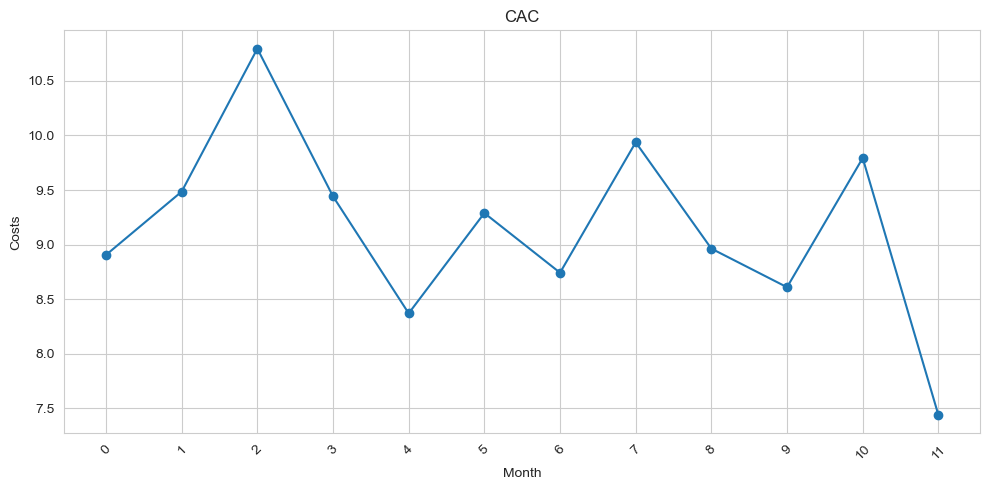

In [135]:
# Plotting a chart
plt.figure(figsize=(10, 5))
plt.plot(report_.index, report_['cac'].values, marker='o')
plt.title('CAC')
plt.xlabel('Month')
plt.ylabel('Costs')
plt.xticks(ticks= report_.index, rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [137]:
print(report_['cac'].mean())

9.147357292482544


<span style = "color: black; font-family: arial; font-size: 20px;">
The acquisition of each customer cost the company an average of $ 9.14

In [140]:
# Aggregating each customer by Source ID
users = visits_full.sort_values('session_start_ts').groupby('uid').first()
users = users[['source_id']]
users.head()

,source_id
uid,
11863502262781,3
49537067089222,2
297729379853735,3
313578113262317,2
325320750514679,5


In [141]:
# Adding Source ID to the buyers table
buyers = pd.merge(buyers, users, left_on='uid', right_index=True)
buyers.head()

,uid,first_session_start_ts,first_session_dt,first_session_month,first_order_ts,first_order_dt,first_order_month,days_to_first_purchase,source_id
0,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09,2018-01-03 21:51:00,2018-01-03,2018-01,106,2
1,1575281904278712,2017-06-03 10:13:00,2017-06-03,2017-06,2017-06-03 10:13:00,2017-06-03,2017-06,0,10
2,2429014661409475,2017-10-11 17:14:00,2017-10-11,2017-10,2017-10-11 18:33:00,2017-10-11,2017-10,0,3
3,2464366381792757,2018-01-27 20:10:00,2018-01-27,2018-01,2018-01-28 15:54:00,2018-01-28,2018-01,0,5
4,2551852515556206,2017-11-24 10:14:00,2017-11-24,2017-11,2017-11-24 10:14:00,2017-11-24,2017-11,0,5


In [144]:
# Grouping the number of buyers by source ID and first order
buyers_daily = buyers.groupby(['source_id', 'first_order_dt']).agg({'uid': 'count'}).reset_index()
buyers_daily.rename(columns={'uid': 'n_buyers'}, inplace=True)
buyers_daily.head()

,source_id,first_order_dt,n_buyers
0,1,2017-06-01,14
1,1,2017-06-02,7
2,1,2017-06-03,7
3,1,2017-06-04,3
4,1,2017-06-05,18


In [146]:
# Adding CAC
costs_cac = pd.merge(buyers_daily, costs, left_on=['source_id', 'first_order_dt'], right_on=['source_id', 'dt'])
costs_cac['cac'] = costs_cac['costs'] / costs_cac['n_buyers']
costs_cac.head()

,source_id,first_order_dt,n_buyers,dt,costs,cost_month,cac
0,1,2017-06-01,14,2017-06-01,75.20,2017-06,5.371429
1,1,2017-06-02,7,2017-06-02,62.25,2017-06,8.892857
2,1,2017-06-03,7,2017-06-03,36.53,2017-06,5.218571
3,1,2017-06-04,3,2017-06-04,55.00,2017-06,18.333333
4,1,2017-06-05,18,2017-06-05,57.08,2017-06,3.171111


In [148]:
# Creating a customer ccquisition pivot table by Source ID
analysis_cac = costs_cac.pivot_table(index='cost_month', columns='source_id', values='cac', aggfunc='mean')
analysis_cac

source_id,1,2,3,4,5,9,10
cost_month,,,,,,,
2017-06,11.681283,12.883568,16.716919,10.792094,9.209676,5.253654,4.590158
2017-07,9.491485,18.000253,18.593952,8.054482,7.938157,5.582433,6.151880
2017-08,12.118898,18.886449,19.795068,11.554926,6.879620,4.900254,5.813398
2017-09,8.155731,17.672249,13.084043,9.533800,6.864844,6.049126,8.306581
2017-10,8.202083,14.193003,14.613088,6.233562,6.305969,5.923235,6.362921
2017-11,8.908503,17.437690,16.091445,5.013132,9.368019,9.400503,10.801337
2017-12,8.570439,13.871086,12.948321,5.656507,8.399174,7.899420,7.803197
2018-01,11.719181,15.850151,15.134989,5.901092,9.371755,9.792713,9.851557
2018-02,10.752216,18.209325,13.894612,5.428068,7.725369,8.181382,4.489624


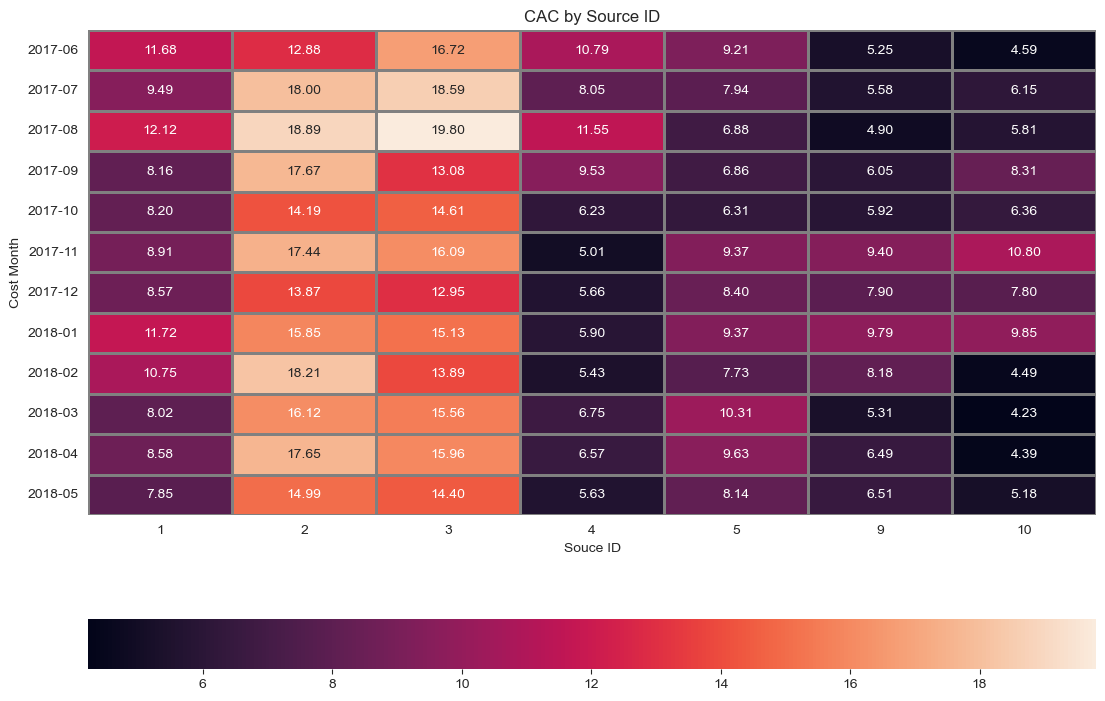

In [150]:
# Plotting a Heat Map
analysis_cac.index=analysis_cac.index.astype(str)
plt.figure(figsize = (13,9))
sns.heatmap(analysis_cac, annot=True, fmt='.2f', linewidths=1, linecolor='grey', cbar_kws= {'orientation': 'horizontal'}).set(title='CAC by Source ID')
plt.xlabel('Souce ID')
plt.ylabel('Cost Month')
plt.show()

In [151]:
analysis_cac.mean().round(2)

source_id
1      9.50
2     16.31
3     15.57
4      7.26
5      8.35
9      6.77
10     6.50
dtype: float64

<span style = "color: black; font-family: arial; font-size: 20px;">

ID's 2 and 3 have consistently high CAC's suggesting more expensive channels.

ID 3 in August/2017 has a very high CAC.

IDs 10 and 9 are the most economical in most months.

IDs with higher CAC may have less priority, unless they deliver more value customers over time (LTV)

<span style = "color: Blue; Font-Family: Arial; Font-Size: 20px;">
Calculating ROMI

In [156]:
cohort_report.head()

,first_order_month,n_buyers,order_month,revenue,age_month,ltv
0,2017-06,2023,2017-06,9557.49,0,4.724414
1,2017-06,2023,2017-07,981.82,1,0.485329
2,2017-06,2023,2017-08,885.34,2,0.437637
3,2017-06,2023,2017-09,1931.30,3,0.954671
4,2017-06,2023,2017-10,2068.58,4,1.022531


In [158]:
# Calculating the costs per month
monthly_costs = costs.groupby('cost_month')['costs'].sum().reset_index()
monthly_costs

,cost_month,costs
0,2017-06,18015.00
1,2017-07,18240.59
2,2017-08,14790.54
3,2017-09,24368.91
4,2017-10,36322.88
5,2017-11,37907.88
6,2017-12,38315.35
7,2018-01,33518.52
8,2018-02,32723.03
9,2018-03,30415.27


In [160]:
report_romi = pd.merge(cohort_report, monthly_costs, left_on='first_order_month', right_on='cost_month' )
report_romi.head()

,first_order_month,n_buyers,order_month,revenue,age_month,ltv,cost_month,costs
0,2017-06,2023,2017-06,9557.49,0,4.724414,2017-06,18015.0
1,2017-06,2023,2017-07,981.82,1,0.485329,2017-06,18015.0
2,2017-06,2023,2017-08,885.34,2,0.437637,2017-06,18015.0
3,2017-06,2023,2017-09,1931.30,3,0.954671,2017-06,18015.0
4,2017-06,2023,2017-10,2068.58,4,1.022531,2017-06,18015.0


In [162]:
# Adding ROMI values
report_romi['cac'] = report_romi['costs'] / report_romi['n_buyers']
report_romi['romi'] = report_romi['ltv'] / report_romi['cac']
romi = report_romi.pivot_table(
    index='first_order_month', columns='age_month', values='romi', aggfunc='mean'
)

romi = romi.cumsum(axis=1).round(2)
romi.fillna('')

age_month,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06,0.53,0.59,0.63,0.74,0.86,0.94,1.05,1.11,1.17,1.24,1.31,1.33
2017-07,0.63,0.67,0.73,0.77,0.79,0.81,0.82,0.84,0.85,0.87,0.88,
2017-08,0.49,0.53,0.57,0.61,0.66,0.68,0.7,0.74,0.77,0.78,,
2017-09,0.60,0.72,0.77,1.19,1.23,1.3,1.38,1.4,1.42,,,
2017-10,0.60,0.66,0.68,0.7,0.72,0.74,0.75,0.76,,,,
2017-11,0.55,0.6,0.62,0.65,0.67,0.68,0.69,,,,,
2017-12,0.54,0.57,0.68,0.8,0.84,0.87,,,,,,
2018-01,0.42,0.45,0.48,0.49,0.5,,,,,,,
2018-02,0.46,0.49,0.5,0.51,,,,,,,,


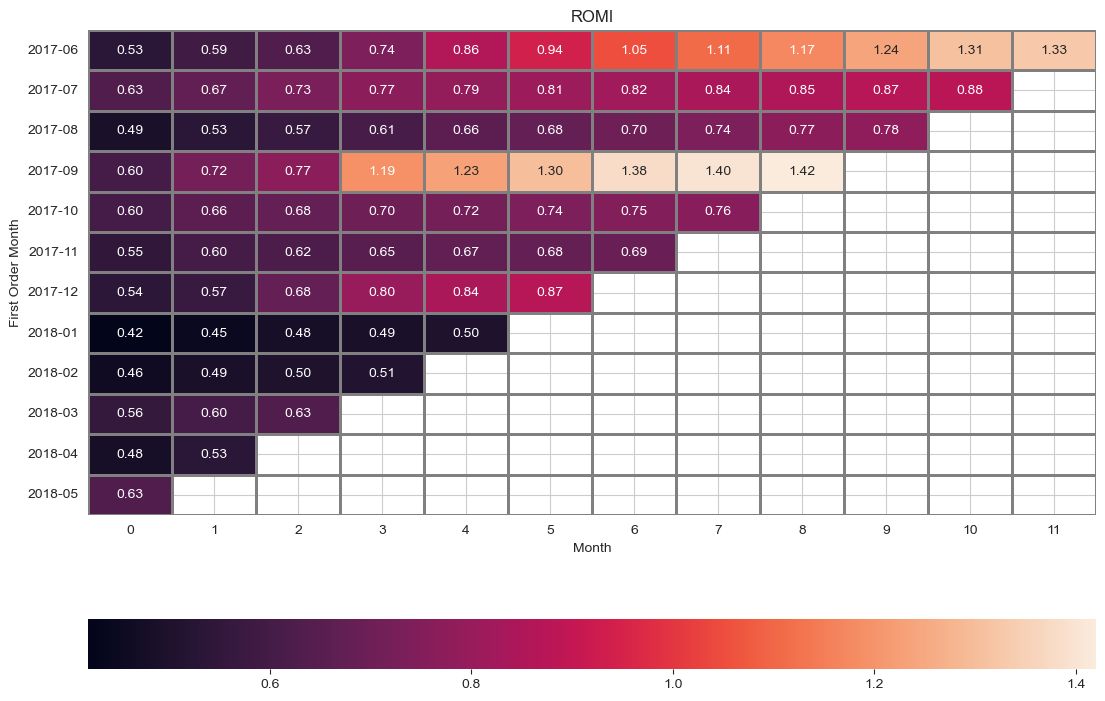

In [164]:
# Plotting a Heat Map
romi.index=romi.index.astype(str)
plt.figure(figsize = (13,9))
sns.heatmap(romi, annot=True, fmt='.2f', linewidths=1, linecolor='grey', cbar_kws= {'orientation': 'horizontal'}).set(title='ROMI')
plt.xlabel('Month')
plt.ylabel('First Order Month')
plt.show()

<span style = "color: black; font-family: arial; font-size: 20px;">

September/2017's cohort had the highest return.

Cohorts like January/2018 had a lower ROMI value indicating that perhaps the marketing campaign of that month was less effective, or the customer's behavior changed.

<span style = "color: Blue; Font-Family: Arial; Font-Size: 20px;">

Calculating ROI

In [168]:
# Finding the user's first purchase month
first_orders_df = orders.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_orders_df.columns = ['uid', 'first_purchase']
first_orders_df.head()

,uid,first_purchase
0,313578113262317,2018-01
1,1575281904278712,2017-06
2,2429014661409475,2017-10
3,2464366381792757,2018-01
4,2551852515556206,2017-11


In [170]:
# Associating each user with their Source ID
user_source = visits[['uid', 'source_id']].drop_duplicates()
first_orders_df = pd.merge(first_orders_df, user_source, on= 'uid')
first_orders_df.head()

,uid,first_purchase,source_id
0,313578113262317,2018-01,2
1,1575281904278712,2017-06,10
2,2429014661409475,2017-10,3
3,2464366381792757,2018-01,5
4,2551852515556206,2017-11,5


In [172]:
# Calculating revenue per user per month and linking revenue to month and Source ID
revenue_df = orders.groupby(['uid', 'order_month']).agg({'revenue': 'sum'}).reset_index()
buyers_number = first_orders_df.merge(revenue_df, on='uid')
buyers_number.head()

,uid,first_purchase,source_id,order_month,revenue
0,313578113262317,2018-01,2,2018-01,0.55
1,1575281904278712,2017-06,10,2017-06,3.05
2,2429014661409475,2017-10,3,2017-10,73.33
3,2464366381792757,2018-01,5,2018-01,2.44
4,2551852515556206,2017-11,5,2017-11,10.99


In [174]:
# Calculating total revenue and total costs by Source ID and month
revenue_grouped_df = buyers_number.groupby(['source_id', 'order_month']).agg({'revenue': 'sum'}).reset_index()
costs_grouped_df = costs.groupby(['source_id','cost_month']).agg({'costs': 'sum'}).reset_index()
costs_grouped_df.columns = ['source_id', 'month', 'costs']

revenue_grouped_df.columns = ['source_id', 'month', 'revenue']
revenue_grouped_df.head()

,source_id,month,revenue
0,1,2017-06,2563.84
1,1,2017-07,3947.25
2,1,2017-08,3325.64
3,1,2017-09,8193.42
4,1,2017-10,11466.14


In [176]:
# Putting costs and revenue together
reportt = pd.merge(
    costs_grouped_df,
    revenue_grouped_df,
    left_on=['source_id', 'month'],
    right_on=['source_id', 'month']
)
reportt.head()

,source_id,month,costs,revenue
0,1,2017-06,1125.61,2563.84
1,1,2017-07,1072.88,3947.25
2,1,2017-08,951.81,3325.64
3,1,2017-09,1502.01,8193.42
4,1,2017-10,2315.75,11466.14


In [178]:
# Calculating ROI
total_costs = reportt['costs'].sum()
total_revenue = reportt['revenue'].sum()
ROI = (total_revenue - total_costs) / total_costs * 100
print(ROI)

80.1122815243336


<span style = "color: black; font-family: arial; font-size: 20px;">
Current ROI is approximately 80%

# Conclusions and recommendations

<span style = "color: black; font-family: arial; font-size: 20px;">

Data analysis revealed key points on retention, LTV and marketing channel efficiency:

---

🔹 Customer retention and behavior
- **High initial turnover**: sharp drop in retention in the first months.
- **Low -term retention**, although customers who stay tend to make more orders over time.
- Mean time until the first purchase: **~ 16 days** after the first session.

---

🔹 LTV (Lifetime Value)
- **Average LTV**: 8.05 for the entire period.
- Consistent LTV growth over the months in all cohorts.
- **Highlight**: **September/2017** cohort had the largest LTV registered (13.44 in the month 8).

---

🔹 Marketing spends and efficiency
- Total invested: **$ 329,131.62**.
- Investment peaks between **months 4 and 6**.
- **Source ID 3**: Highest cost, with higher CAC between 10/2017 and 03/2018.
- **SOURCES ID 9 and 10**: more economical ones in most months.
- Channels with high CAC (IDS 2 and 3) should be prioritized only if they generate LTV higher than average.

---

🔹 ROI and ROMI
- Current ROI: **~ 80%**, meaning that the return obtained was 80% above the amount invested.
- This value indicates that marketing investment has been **lucrative**, but there is still room for optimization, as well as there are channels and cohorts with ROI greater than 100%.
- SEPTEMBER AND OCTOBER/2017 Cohorts presented **quick and high return**.
- Cohort of January/2018 had a lower ROMI, possibly due to the lower effectiveness of the campaign or a change in the customer's behavior.

---

📌 Recommendations
- Reduce investment in channels with **higher CAC's and low returns**.
- Prioritize **more economical channels** with good historical performance (IDs 9 and 10).
- Concentrate efforts in the periods and cohorts that present **major LTV and positive ROMI**.
- Replicate successful ROI cohort strategies above average to increase overall profitability.